In [15]:
import random
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd

from scipy.stats import norm, skewnorm

In [54]:
import os

zones = ['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']

test_z_scores_dict = dict()
test_z_scores = []

relative_perfs = pd.DataFrame()
relative = []

folder = ".\\experiments\\vanilla_comp\\"
for fname in os.listdir(folder):
    if fname.endswith("relative_perfs.npy"):
        month = fname[12:15]
        relative_perfs[month] = np.load(os.path.join(folder, fname))
        relative.extend(relative_perfs[month])
    if fname.endswith("test_z_scores.npy"):
        month = fname[12:15]
        test_z_scores_dict[month] = np.load(os.path.join(folder, fname))
        test_z_scores.extend((test_z_scores_dict[month][:, :, 0][0]).tolist())
relative_perfs.index = ['ISONE CA', 'ME', 'RI', 'VT', 'CT', 'NH', 'SEMASS', 'WCMASS', 'NEMASSBOST']
relative_perfs = relative_perfs.T
relative_perfs = relative_perfs.loc[["Jan", "Mar", "May", "Jul", "Sep", "Nov"]]

In [55]:
relative_perfs["mean"] = relative_perfs.mean(axis=1)
relative_perfs

,ISONE CA,ME,RI,VT,CT,NH,SEMASS,WCMASS,NEMASSBOST,mean
Jan,13.592506,7.236752,-6.215116,7.746979,3.906798,21.472776,11.770540,9.247547,6.775420,8.392689
Mar,23.855705,25.308858,26.019216,28.779207,23.574001,27.390719,27.842909,16.648319,14.803507,23.802493
May,5.424575,1.642643,-6.786470,21.734621,-3.482819,8.421488,2.127361,-0.110955,-12.081322,1.876569
Jul,26.277853,23.731817,19.811630,9.921223,30.552949,29.724549,19.395234,14.566929,12.041061,20.669249
Sep,-5.316200,2.166968,5.102784,3.977093,-2.104084,0.033106,0.345824,-2.654832,0.625954,0.241846
Nov,24.500806,15.494809,15.700225,15.330661,18.274852,24.730446,17.592083,21.534310,21.735693,19.432654


In [56]:
np.std(relative)

11.177910746471891

In [57]:
# 95\% confidence interval (not accurate, these samples are not independent). We assume that the 6 months we tested on (every other month) are representative
# of our overall performance on the 6 rounds of GEFCom2017. (maybe explain more why this is as fair of a comparison as it gets)
me = np.mean(relative), 
er = np.std(perfs_by_zone, ddof=1) / np.sqrt(6)  # ?
print(me, 2 * er)
me - 2 * er, me + 2 * er

(12.40258348152922,) 8.34647528798213


(array([4.05610819]), array([20.74905877]))

In [58]:
np.std(perfs_by_zone)
9 * 7.6 / 11

6.218181818181818

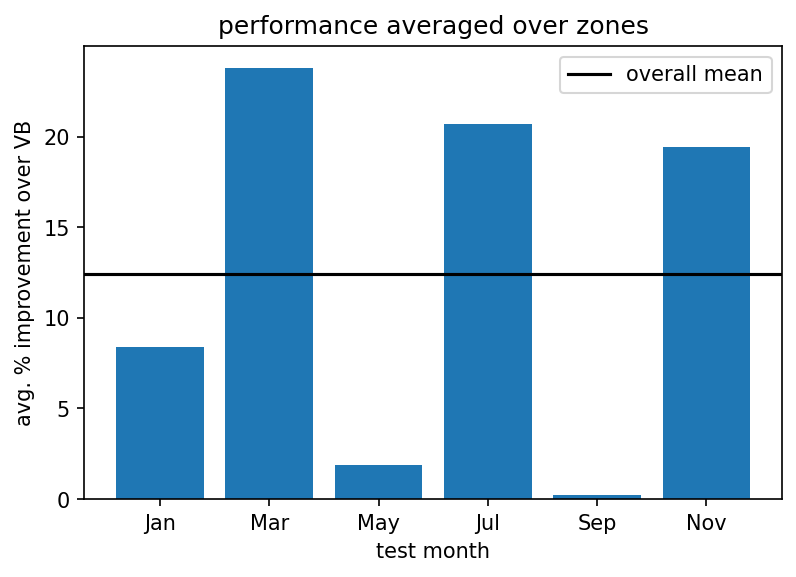

In [59]:
plt.figure(dpi=150)
plt.bar(np.arange(6), relative_perfs["mean"], tick_label=relative_perfs.index)
plt.axhline(me, color="k", label="overall mean")
plt.title("performance averaged over zones")
plt.ylabel("avg. % improvement over VB")
plt.xlabel("test month")
plt.legend()

In [63]:
np.std([10, 10, 10, 10, 10, 0, 0, 0, 0, 0])

5.0

(-0.2234078623571291, 1.2162113742815008)

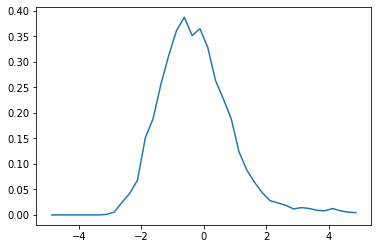

In [64]:
z_hist, bin_edges = np.histogram(test_z_scores, bins=40, range=(-5, 5), density=True)
z_axis = (bin_edges[1:] + bin_edges[:-1]) / 2
plt.plot(z_axis, z_hist, label="Koopman test z-scores")
# plt.plot(z_axis, normal_pdf(0, 1, z_axis), label="Standard Normal Curve")
# plt.title(list(all_data.keys())[i])
np.mean(test_z_scores), np.mean(np.std(test_z_scores))

In [67]:
mar_z = np.array(test_z_scores_dict["Mar"])
mar_z.std(axis=1)

array([[1.21289467],
       [0.93627955],
       [1.18226037],
       [1.4224453 ],
       [1.20038223],
       [1.2024106 ],
       [1.19727773],
       [1.27099481],
       [1.27916554]])